# Hackathon Santander - Data Challenge

## Contextualização

Foco do projeto: analisar o impacto do isolamento social provocado pela Covid-19 sobre o setor de vestuário.

"Como tem acontecido nos últimos anos, em 2019 o varejo apresentou um desempenho significativamente superior ao da economia como um todo. Desta vez, o crescimento do Varejo Restrito (que não inclui automóveis e materiais de construção) foi de 1,8%, contra 1,1% do PIB nacional. Movimentando R$ 1,4 trilhão, o Varejo Restrito equivale a 19,24% do PIB. O Varejo Ampliado, por sua vez, alcançou R$ 1,91 trilhão em 2019, com crescimento real de 3,9%, e representa 26,2% do PIB."

(Fonte: https://mercadoefeiras.com.br/index.php/component/k2/item/1582-o-papel-do-varejo-na-economia-brasileira#:~:text=Movimentando%20R%24%201%2C4%20trilhão,26%2C2%25%20do%20PIB.&text=“O%20cenário%20do%20varejo%20em,fechamos%202019”%2C%20comenta%20Terra.)

"Pesquisa do Instituto Brasileiro de Economia da Fundação Getúlio Vargas (Ibre/FGV) mostra que em março os segmentos do comércio mais impactados são em parte ligados a revendedores de bens duráveis e semiduráveis, como veículos, motos e peças (46,4%), material para construção (39,9%) e tecidos, calçados e vestuário (37,2%)."

(Fonte: https://www.gazetadopovo.com.br/economia/economia-apos-coronavirus-setores-ganham-perdem/)

## Importação das bibliotecas necessárias

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)

import scipy as sp
import statsmodels.formula.api as sm

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

from pandas import Series, DataFrame
from sklearn.model_selection import train_test_split

## Leitura dos dados

In [2]:
df = pd.read_excel('dataset.xlsx')

Descrição dos dados:

* gtrend: Série histórica sobre o interesse em compras online (frequência de pesquisas no Google) => fonte: Google Trends
* pmcvest: Volume de Vendas - Vestuário, Calçados e Tecidos  - Variação % => fonte: IBGE/Pesquisa Mensal de Comércio
* isolamento: Variável Dummy - Isolamento Social causado pela pademia da Covid 19 (início: março/2020)	
* icom: Índice de Confiança do Varejo Ampliado => fonte: FGV
* isa: Índice da Situação Atual do Varejo => fonte: FGV
* iecom: Índice de Expectativas do Varejo => fonte: FGV
* icc: Índice de Confiança do Consumidor => fonte: FGV
* icce: Índice de Confiança do Consumidor - Expectativas =>	fonte: FGV
* iiebr: Indicador de Incerteza da Economia => fonte: FGV
* ibcbr: Índice de Atividade Econômica do Banco Central => fonte: BCB
* default: Inadimplência da carteira de crédito das instituições financeiras sob controle privado nacional	=> fonte: BCB
* ipca: Índice nacional de preços ao consumidor => fonte: BCB
* selic: Taxa de juros - Selic acumulada no mês anualizada base 252 => fonte: BCB
* pnad: Taxa de desocupação das pessoas de 14 anos ou mais de idade => fonte: IBGE/PNAD Contínua





In [3]:
# Comportamento histórico da variável de interesse (pmcvest)
trace = go.Bar(y = df['pmcvest'], x =  df['data'])
plt.figure(figsize = (20, 12))
data = [trace]
layout = go.Layout(title = 'Volume de vendas Vestuário, Tecidos e Calçados (variação %)',
                   xaxis = {'title': 'Data'},
                   yaxis = {'title': 'Variação %'},
                   barmode = 'stack')
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

<Figure size 1440x864 with 0 Axes>

A partir de março/2020 (início do isolamento social ocaionado pela Covid-19), é possível observar uma queda acentuada no volume de vendas do subsetor do comércio varejista de Vestuário, Tecidos e Calçados.

In [4]:
# Evolução do interesse em comércio online
trace = go.Scatter(y = df['gtrend'], x =  df['data'], mode = 'lines')
plt.figure(figsize = (20, 12))
data = [trace]
layout = go.Layout(title = 'Evolução do interesse em comério online',
                   xaxis = {'title': 'Data'})
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

<Figure size 1440x864 with 0 Axes>

Ao mesmo tempo em que se observa uma queda acentuada no volume de vendas de Vestuário, Tecidos e Calçados, é possível observar um aumento no interesse por compras online.

In [5]:
trace1 = go.Scatter(y = df['pmcvest'],
                x =  df['data'],
                name = 'Vendas',
                marker = {'color': '#DF0101'})

trace2 = go.Scatter(y = df['gtrend'],
                x =  df['data'],
                name = 'Trends',
                marker = {'color': '#0404B4'})

data = [trace1, trace2]

layout = go.Layout(title = 'Vendas - Vestuário (%) (vendas) x Interesse por comércio online (trends)',
                   xaxis = {'title': 'Data'})

fig = go.Figure(data=data, layout=layout)

py.iplot(fig)

## Breve análise dos dados

In [6]:
# Dimensões do dataframe
df.shape

(99, 15)

In [7]:
# Exibição de todas as variáveis do dataframe
df.columns

Index(['data', 'pmcvest', 'isolamento', 'gtrend', 'icom', 'isa', 'iecom',
       'icc', 'iiebr', 'ibcbr', 'default', 'ipca', 'selic', 'icce', 'pnad'],
      dtype='object')

In [8]:
# Primeiras linhas do dataframe
df.head()

,data,pmcvest,isolamento,gtrend,icom,isa,iecom,icc,iiebr,ibcbr,default,ipca,selic,icce,pnad
0,2012-03-01,4.1,0,51,105.8,100.9,109.5,109.2,97.1,146.35,5.12,5.24,9.82,108.4,7.9
1,2012-04-01,-1.1,0,47,103.5,101.7,104.6,110.9,97.1,139.85,5.26,5.10,9.35,111.1,7.7
2,2012-05-01,3.8,0,51,100.7,98.4,102.7,110.4,94.1,144.56,5.33,4.99,8.87,110.9,7.6
3,2012-06-01,0.3,0,44,103.2,100.7,105.1,107.8,96.7,142.28,5.40,4.92,8.39,108.8,7.5
4,2012-07-01,5.5,0,48,103.6,100.8,105.7,105.8,96.3,147.46,5.39,5.20,8.07,105.7,7.4


In [9]:
# Resumo Estatístico
df.describe()

,pmcvest,isolamento,gtrend,icom,isa,iecom,icc,iiebr,ibcbr,default,ipca,selic,icce,pnad
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,-2.575758,0.030303,41.020202,90.868687,89.519192,94.248485,88.252525,105.761616,139.795758,4.296162,5.683939,9.376364,93.288889,9.891919
std,12.490544,0.172292,12.098220,11.858758,12.172868,10.663799,12.506091,11.289328,6.510185,0.573784,2.270210,3.197533,13.086977,2.457129
min,-75.500000,0.000000,28.000000,64.200000,65.600000,65.900000,59.300000,85.100000,118.570000,3.410000,1.880000,3.010000,57.600000,6.200000
25%,-7.300000,0.000000,32.500000,84.100000,78.600000,87.850000,81.400000,96.300000,136.020000,3.820000,3.950000,6.400000,89.250000,7.350000
50%,-0.700000,0.000000,37.000000,93.600000,91.800000,96.400000,88.600000,105.700000,139.220000,4.180000,5.530000,8.900000,96.400000,11.000000
75%,4.150000,0.000000,47.000000,100.450000,99.400000,102.850000,96.700000,113.950000,144.355000,4.775000,6.645000,12.150000,102.200000,12.050000
max,15.500000,1.000000,100.000000,110.300000,115.300000,110.400000,110.900000,136.800000,152.130000,5.400000,10.710000,14.150000,112.600000,13.700000


In [10]:
# Análise dos tipos de dados
df.dtypes

data          datetime64[ns]
pmcvest              float64
isolamento             int64
gtrend                 int64
icom                 float64
isa                  float64
iecom                float64
icc                  float64
iiebr                float64
ibcbr                float64
default              float64
ipca                 float64
selic                float64
icce                 float64
pnad                 float64
dtype: object

In [11]:
# Informação do dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   data        99 non-null     datetime64[ns]
 1   pmcvest     99 non-null     float64       
 2   isolamento  99 non-null     int64         
 3   gtrend      99 non-null     int64         
 4   icom        99 non-null     float64       
 5   isa         99 non-null     float64       
 6   iecom       99 non-null     float64       
 7   icc         99 non-null     float64       
 8   iiebr       99 non-null     float64       
 9   ibcbr       99 non-null     float64       
 10  default     99 non-null     float64       
 11  ipca        99 non-null     float64       
 12  selic       99 non-null     float64       
 13  icce        99 non-null     float64       
 14  pnad        99 non-null     float64       
dtypes: datetime64[ns](1), float64(12), int64(2)
memory usage: 11.7 KB


In [12]:
# Identificação e tratamento de _missing values_
df.isna().sum()

data          0
pmcvest       0
isolamento    0
gtrend        0
icom          0
isa           0
iecom         0
icc           0
iiebr         0
ibcbr         0
default       0
ipca          0
selic         0
icce          0
pnad          0
dtype: int64

O dataframe não possui _missing values_ (NA)

## Análise exploratória dos dados

Histogramas das variáveis

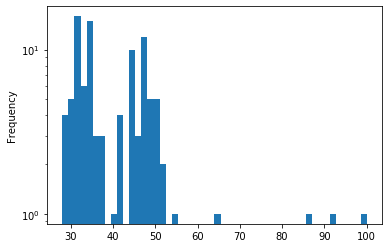

In [13]:
# Série histórica sobre o interesse em compras online
df['gtrend'].plot.hist(bins = 50, log= True)
plt.show()

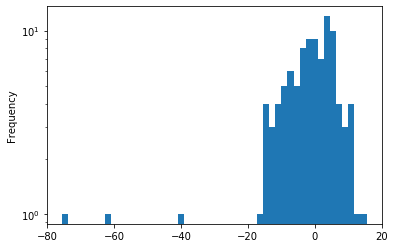

In [14]:
# Volume de Vendas - Vestuário, Calçados e Tecidos  - Variação %
df['pmcvest'].plot.hist(bins = 50, log= True)
plt.show()

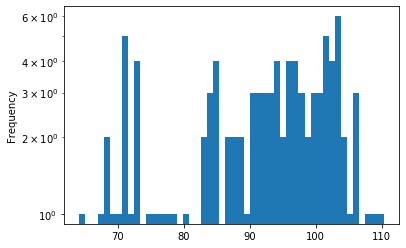

In [15]:
# Índice de Confiança do Varejo Ampliado
df['icom'].plot.hist(bins = 50, log= True)
plt.show()

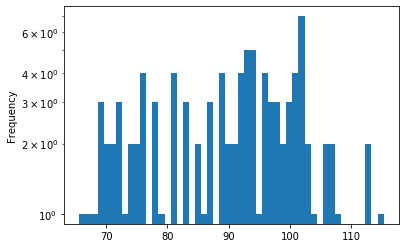

In [16]:
# Índice da Situação Atual do Varejo
df['isa'].plot.hist(bins = 50, log= True)
plt.show()

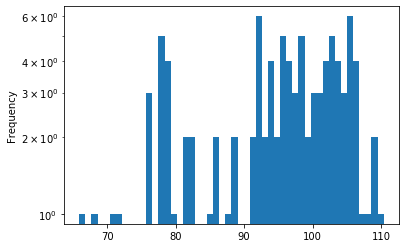

In [17]:
# Índice de Expectativas do Varejo
df['iecom'].plot.hist(bins = 50, log= True)
plt.show()

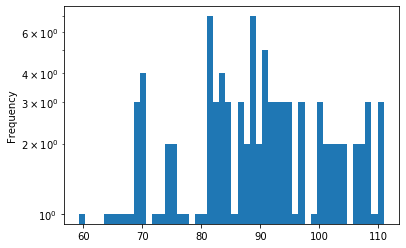

In [18]:
# Índice de Confiança do Consumidor
df['icc'].plot.hist(bins = 50, log= True)
plt.show()

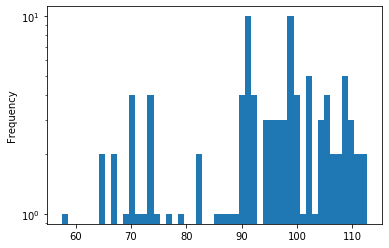

In [19]:
# Índice de Confiança do Consumidor - Expectativas
df['icce'].plot.hist(bins = 50, log= True)
plt.show()

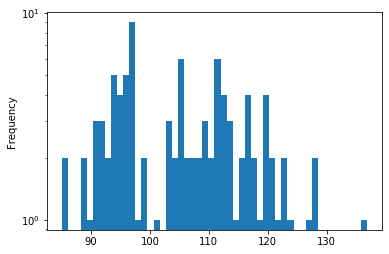

In [20]:
# Indicador de Incerteza da Economia
df['iiebr'].plot.hist(bins = 50, log= True)
plt.show()

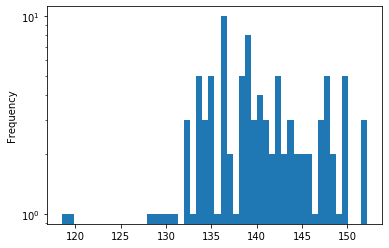

In [21]:
# Índice de Atividade Econômica do Banco Central
df['ibcbr'].plot.hist(bins = 50, log= True)
plt.show()

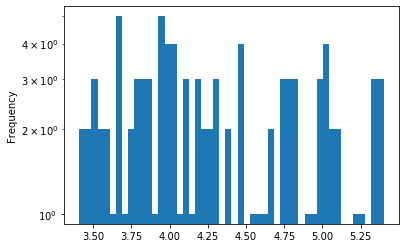

In [22]:
# Inadimplência da carteira de crédito das instituições financeiras sob controle privado nacional
df['default'].plot.hist(bins = 50, log= True)
plt.show()

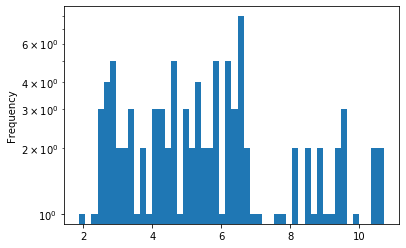

In [23]:
# Índice nacional de preços ao consumidor
df['ipca'].plot.hist(bins = 50, log= True)
plt.show()

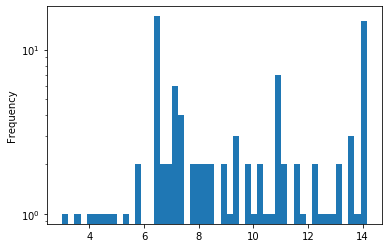

In [24]:
# Taxa de juros - Selic acumulada no mês anualizada base 252
df['selic'].plot.hist(bins = 50, log= True)
plt.show()

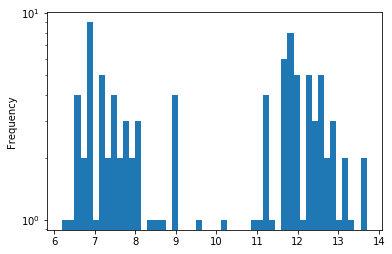

In [25]:
# Taxa de desocupação das pessoas de 14 anos ou mais de idade
df['pnad'].plot.hist(bins = 50, log= True)
plt.show()

Correlação entre as variáveis

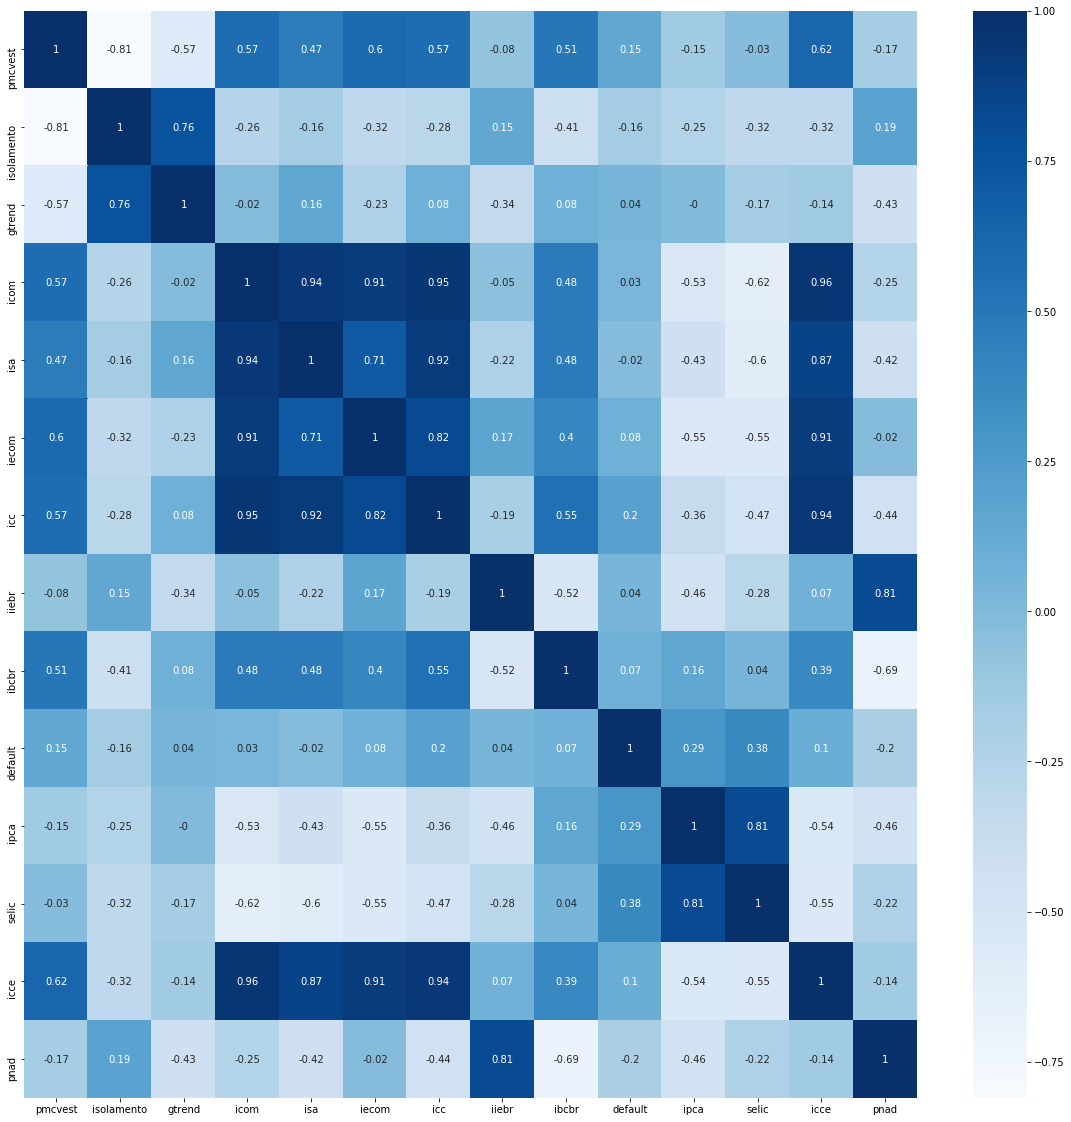

In [26]:
plt.figure(figsize = (20,20))
sns.heatmap(df.corr().round(2), annot= True, annot_kws = {"size": 10}, linecolor= 'black', cmap= 'Blues')

Variável de interesse: Volume de Vendas - Vestuário, Calçados e Tecidos - Variação % (pcmvest)

* Variáveis positivamente correlacionadas com pmcvest: icom, isa, iecom, icc, ibcbr, default, icce
* Variáveis negativamente correlacionadas com pmcvest: isolamento, gtrend, iiebr, ipca, selic, pnad

## Regressão Linear a partir do Método de Mínimos Quadrados Ordinários

Hipótese testada: o isolamento social causado pela pandemia da Covid-19 afeta negativamente o setor de 'Vestuário, Tecidos e Calçados'

Relação funcional: $Y = \beta.X + \epsilon$

onde Y é o Volume de Vendas de Vestuário, Calçados e Tecidos (pmcvest) e  X é vetor contendo as seguintes variáveis explicativas, interesse em compras online (gtrend), isolamento social (isolamento), Índice de Confiança do Varejo Ampliado (icom), Índice da Situação Atual do Varejo (isa), Índice de Expectativas do Varejo (iecom), Índice de Confiança do Consumidor (icc), Índice de Confiança do Consumidor - Expectativas (icce), Indicador de Incerteza da Economia (iiebr), Índice de Atividade Econômica do Banco Central (ibcbr), Inadimplência da carteira de crédito das instituições financeiras sob controle privado nacional (default), Índice nacional de preços ao consumidor (ipca), Taxa de juros Selic (selic), Taxa de desocupação das pessoas de 14 anos ou mais de idade (pnad). $\epsilon$ é o erro aleatório com média zero e variância $\sigma^2$.

In [27]:
reg = sm.ols(formula='pmcvest ~ gtrend + isolamento + icom + isa + iecom + icc + icce + iiebr + ibcbr + default + ipca + selic + pnad', data=df).fit()

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                pmcvest   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     40.96
Date:                Sun, 02 Aug 2020   Prob (F-statistic):           5.31e-31
Time:                        18:25:23   Log-Likelihood:                -291.79
No. Observations:                  99   AIC:                             611.6
Df Residuals:                      85   BIC:                             647.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -192.3905    143.228     -1.343      0.183    -477.166      92.385
gtrend        -0.0917      0.173     -0.532      0.596      -0.435       0.251
isolamento   -46.7035     11.459     -4.076      0.000     -69.486     -23.921
icom         -10.7050     11.661     -0.918      0.361     -33.890      12.480
isa            6.1595      6.561      0.939      0.350      -6.885      19.204
iecom          5.7601      6.478      0.889      0.376      -7.120      18.640
icc           -0.5141      0.462     -1.114      0.269      -1.432       0.404
icce           0.6083      0.414      1.471      0.145      -0.214       1.431
iiebr         -0.1059      0.090     -1.174      0.244      -0.285       0.073
ibcbr          0.5131      0.142      3.626      0.000       0.232       0.795
default        3.6593      1.673      2.188      0.031       0.333       6.985
ipca          -2.2033      0.530     -4.160      0.000      -3.256      -1.150
selic          0.1606      0.484      0.332      0.741      -0.802       1.123
pnad          -0.3183      0.978     -0.325      0.746      -2.263       1.627
==============================================================================
Omnibus:                        1.878   Durbin-Watson:                   1.644
Prob(Omnibus):                  0.391   Jarque-Bera (JB):                1.343
Skew:                           0.131   Prob(JB):                        0.511
Kurtosis:                       3.507   Cond. No.                     7.87e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.87e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Pelo resultado da regressão, o isolamento social e a inflação (ipca) exercem efeitos negativos estatisticamente significantes sobre o volume de vendas do setor de "Vestuário, Tecidos e Calçados". Em contraposição, o nível de atividade econômica (ibcbr) atua como impulsionador deste setor.

In [28]:
# mostrando as previsões para o mesmo conjunto passado
reg.predict()

array([ 3.43583765e+00,  3.36959347e+00,  5.02926940e+00,  5.87914197e+00,
        6.47198953e+00,  6.05946924e+00,  2.66344126e+00,  6.95596592e+00,
        5.18839419e+00,  2.98137291e+00,  5.37235747e-02, -1.80031737e+00,
        2.28359332e+00,  3.66741105e+00,  4.08222209e-01, -1.95439988e+00,
        3.20359438e+00,  5.88946604e+00,  3.32721375e+00,  4.45160460e+00,
        3.97061871e+00,  4.87857107e+00,  6.09366094e-01,  7.04369012e-01,
       -3.30845512e-01,  1.10824513e+00,  1.65745908e+00, -2.32241050e+00,
       -1.49595944e+00,  1.31666821e-01,  1.32057465e+00,  2.29737769e+00,
        3.55100234e-02,  1.47363219e+00, -4.62397560e+00, -8.18337103e+00,
       -3.62284736e+00, -7.84869355e+00, -9.54652473e+00, -1.07515343e+01,
       -9.32029140e+00, -1.10116543e+01, -1.26904162e+01, -1.15143144e+01,
       -1.42888679e+01, -1.28966841e+01, -1.57115572e+01, -1.41086444e+01,
       -8.25758807e+00, -9.89882516e+00, -1.11232447e+01, -8.52329498e+00,
       -5.52357544e+00, -

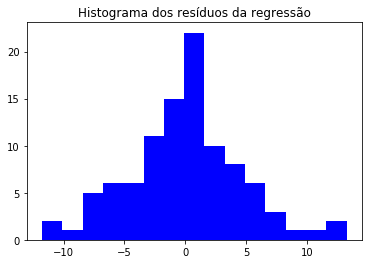

In [30]:
# Histograma dos resíduos da regressão
y_hat = reg.predict()
res = df['pmcvest'] - y_hat

plt.hist(res, color='blue', bins=15)
plt.title('Histograma dos resíduos da regressão')
plt.show()

## Previsão do volume de vendas

Objetivo: propor um modelo para previsão do volume de vendas

Separação dos conjuntos de treino e teste

In [31]:
# 70% dos dados para treino e 30% para teste.
y = df['pmcvest']

X = df[['gtrend','isolamento', 'icom', 'isa', 'iecom', 'icc', 'icce', 'iiebr', 'ibcbr', 'default', 'ipca', 'selic', 'pnad']]

x_train, x_test, y_train, y_test = train_test_split( X, df.pmcvest, test_size=0.3)

In [32]:
# Tamanho dos dados de treino.
x_train.shape, y_train.shape

((69, 13), (69,))

In [33]:
# Tamanho dos dados de teste.
x_test.shape, y_test.shape

((30, 13), (30,))

Instanciando a Regressão Linear

In [34]:
lreg = LinearRegression()

Treinamento do modelo

In [35]:
lreg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
# Calculando os Coeficientes
# São os pesos atribuídos ao atributos para calcular o valor predito.
coeff = DataFrame(x_train.columns)
coeff['Coeficientes'] = Series(lreg.coef_)
coeff

,0,Coeficientes
0,gtrend,-0.157029
1,isolamento,-41.974877
2,icom,-7.716011
3,isa,4.387850
4,iecom,3.978797
5,icc,0.156945
6,icce,0.300483
7,iiebr,-0.089013
8,ibcbr,0.593455
9,default,1.123485


Predizendo os valores para o conjunto de teste

In [37]:
y_pred_test = lreg.predict(x_test)
y_pred_train = lreg.predict(x_train)

Cálculo das métricas de avaliação do modelo

In [38]:
from sklearn import metrics

In [39]:
# Erro Absoluto Médio
mae = metrics.mean_absolute_error(y_train, y_pred_train).round(4)
mae

3.8039

In [40]:
# Erro Quadrático Médio
mse = metrics.mean_squared_error(y_train, y_pred_train).round(4)
mse

21.3643

In [41]:
# Raiz Quadrada do Erro Quadrático Médio
rmse = np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)).round(4)
rmse

4.6222

In [42]:
# Coeficiente de Ajustamento (r-squared )
r2 = lreg.score(x_test,y_test).round(4)
r2

0.83